<a href="https://colab.research.google.com/github/CHenriquezG/Minor-Machine-Learning-test/blob/main/S07-Linear-Models/TareaClaudioML2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set_theme(style="white")



se carga los datos

In [2]:
mpg = sns.load_dataset("mpg")

comprobamos si possen valores null

In [3]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

como existe nos encargamos de esto

In [4]:
df = pd.DataFrame(mpg)

mpg = df.dropna()
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

visualizamos los datos a traves de un grafico de dispersion

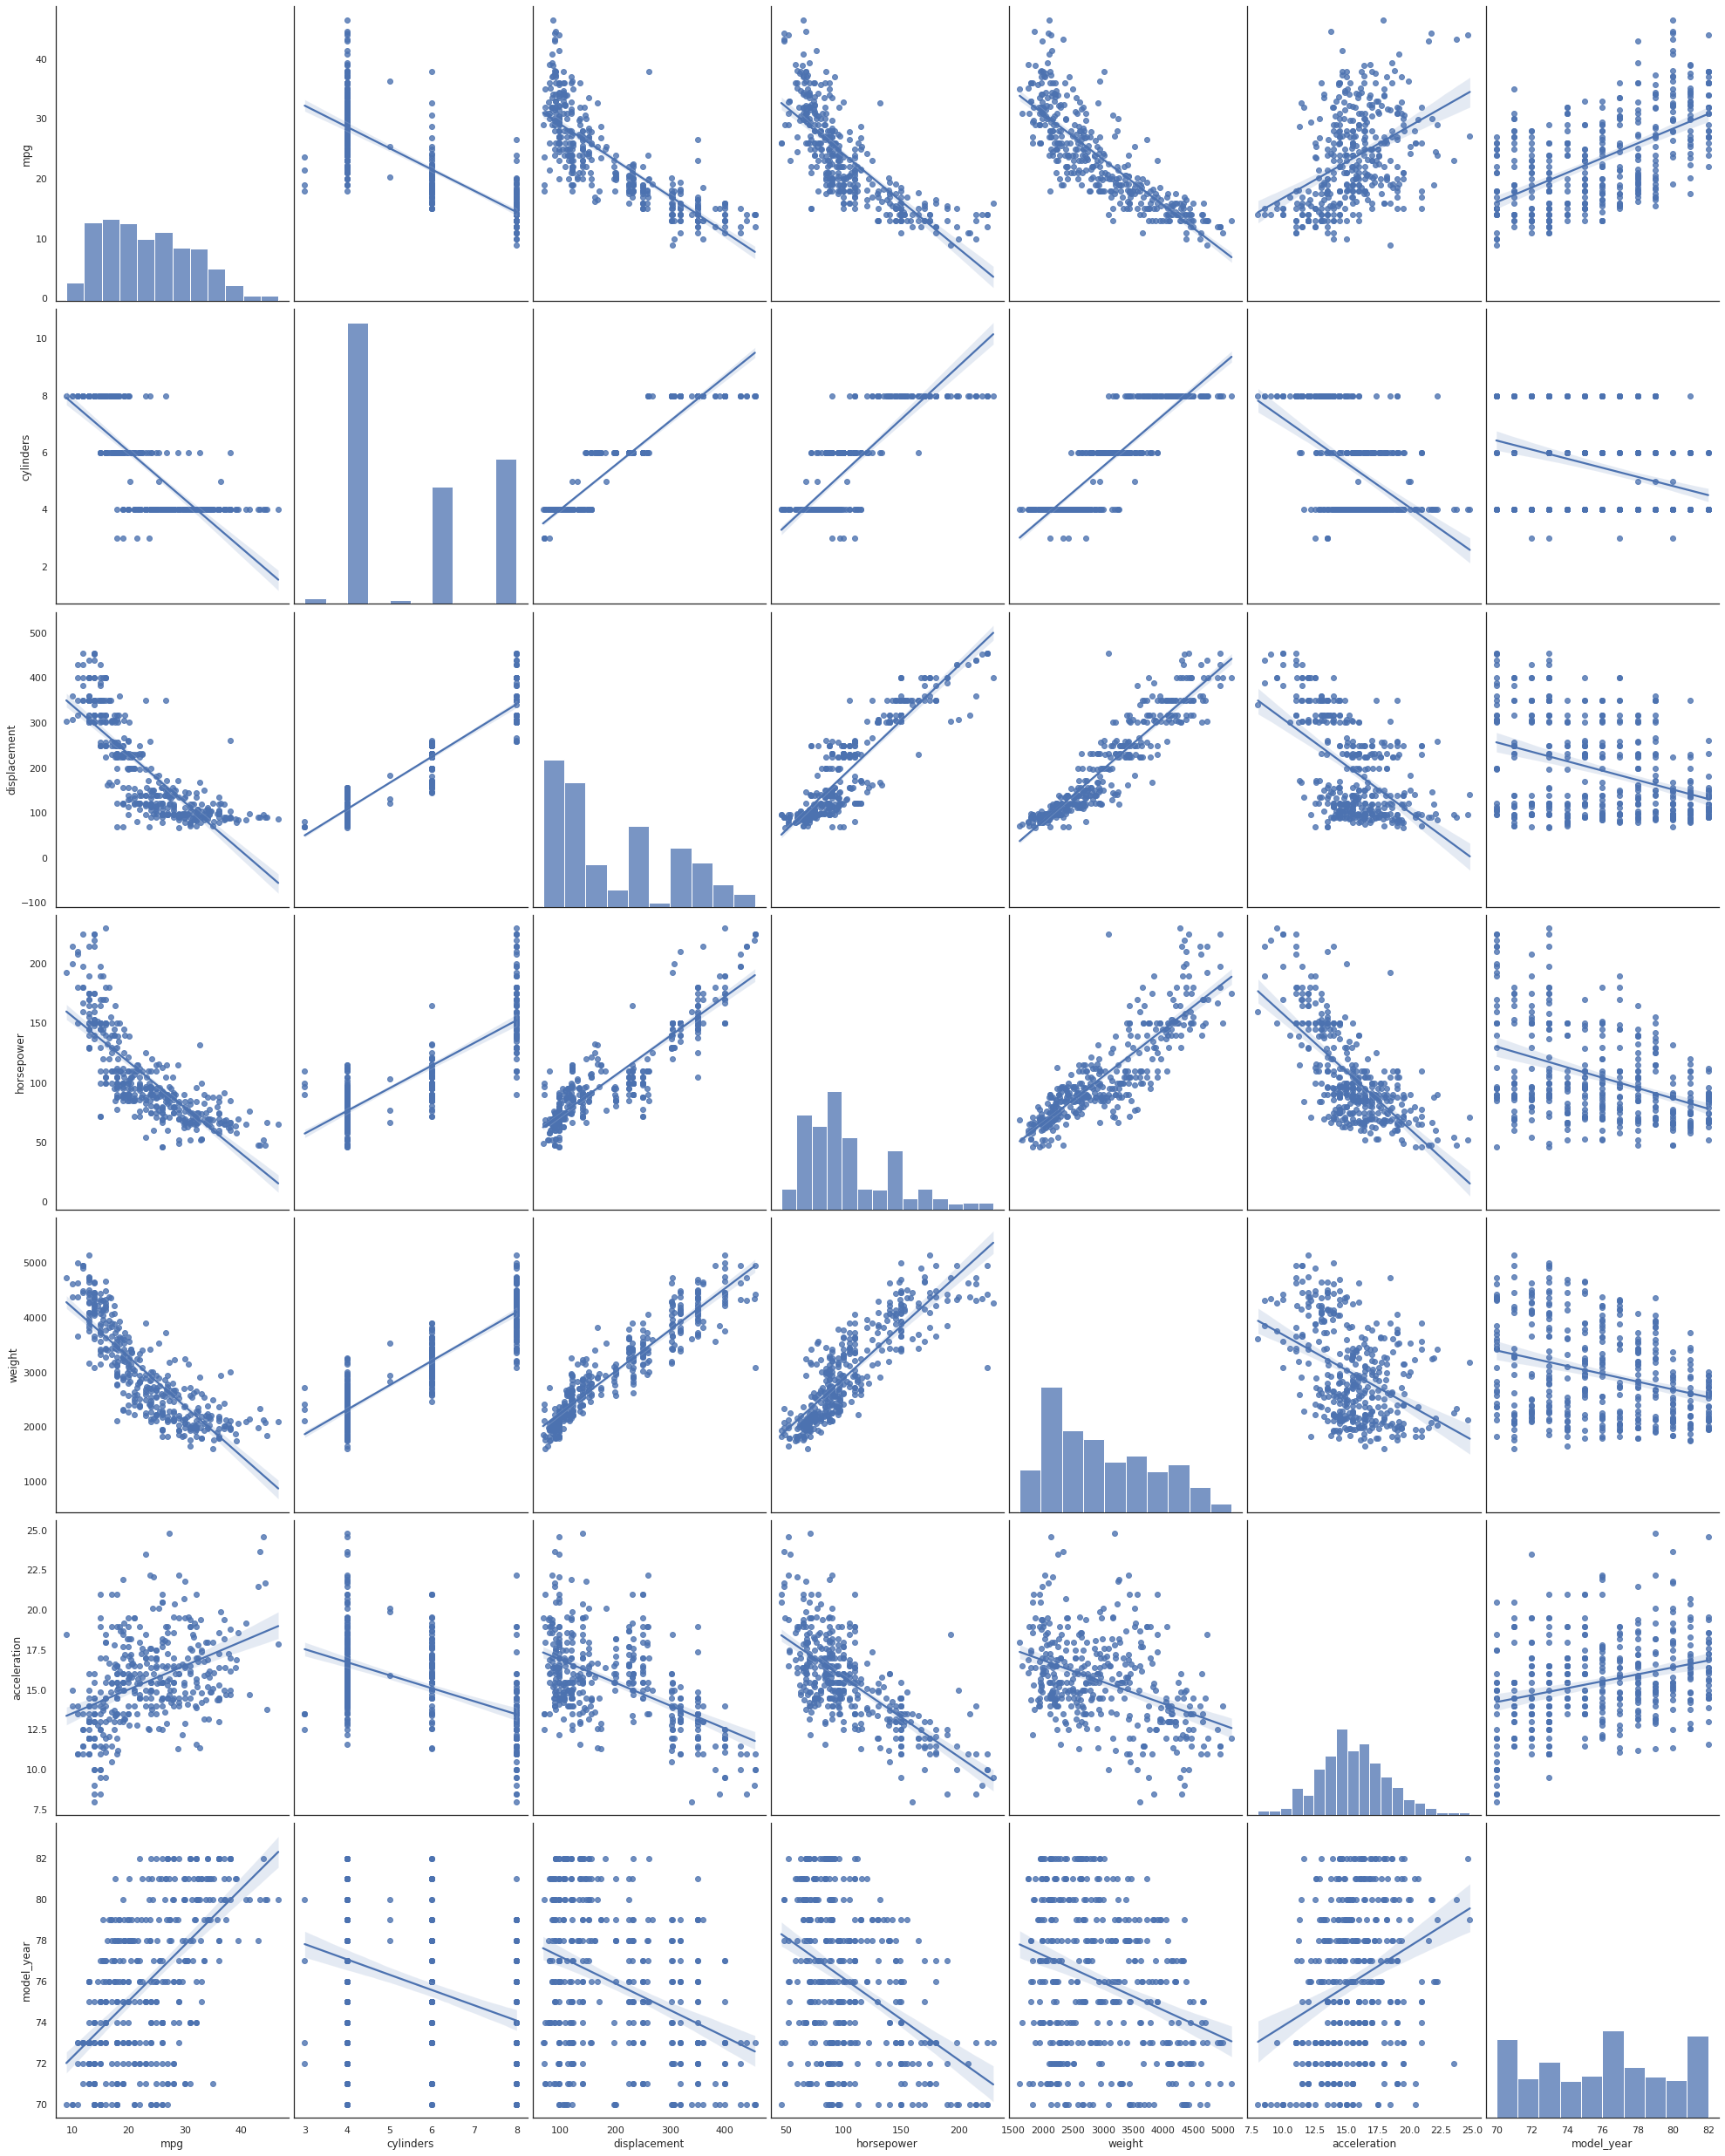

In [5]:
sns.pairplot(mpg,height=5, aspect=.8, kind="reg");

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

In [7]:
mpg_corr = mpg.corr(method="spearman")
mpg_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.823175,-0.855234,-0.853616,-0.875585,0.441539,0.574841
cylinders,-0.823175,1.000000,0.913566,0.816188,0.875972,-0.476266,-0.331087
displacement,-0.855234,0.913566,1.000000,0.876171,0.945630,-0.499403,-0.306582
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.875585,0.875972,0.945630,0.878819,1.000000,-0.405109,-0.280981
acceleration,0.441539,-0.476266,-0.499403,-0.658142,-0.405109,1.000000,0.278306
model_year,0.574841,-0.331087,-0.306582,-0.389498,-0.280981,0.278306,1.000000


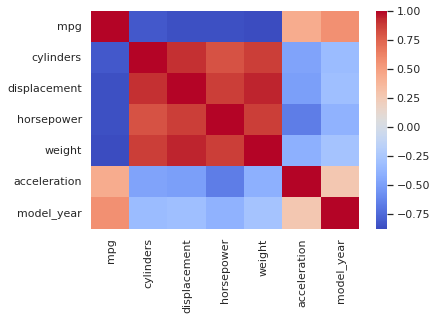

In [8]:

sns.heatmap(mpg_corr,xticklabels=mpg_corr.columns,yticklabels=mpg_corr.columns,cmap='coolwarm')

3) (1 punto) Construir y entrenar un modelo de regresion lineal


se tomara horsepower al ser un valor alto para mpg
y suando la libreria sklearn llamaremos al metodo LinearRegresion()

In [9]:
go = mpg['horsepower']
met = mpg['mpg']
model = LinearRegression()
model.fit(X=go[:, np.newaxis],y=met)
model.__dict__


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([-0.15784473]),
 '_residues': 9385.915871932419,
 'rank_': 1,
 'singular_': array([761.11341642]),
 'intercept_': 39.93586102117047}

$$
mpg = 39.93 + -0.15\cdot horsepower
$$

usamos el metodo de predicion de model

In [10]:
yp = model.predict(X=go[:, np.newaxis])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


e insertamos los datos en la misma tabla solo por comodidad a la hora de representarlos graficamente

In [11]:
mpg.insert(0,'pred',yp)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

usamos score para comparar los datos predecidos con los verdaderos (mpg)

In [12]:
desempeño = model.score(X=go[:, np.newaxis],y=met)
desempeño

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


0.6059482578894348

nuestro modelo tiene un 60% de la variabilidad usando horsepower y mpg en comparacion con el original

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


aca se puede ver graficamente el resumen entre los valores predecidos y los reales

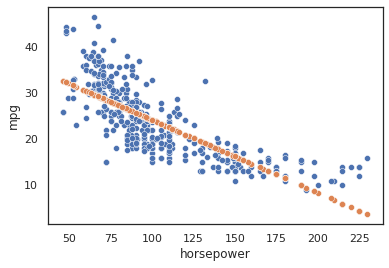

In [13]:
sns.scatterplot(x='horsepower',y='mpg',data=mpg)
sns.scatterplot(x='horsepower',y='pred',data=mpg)

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.

esto fue vinculado a github 